In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [51]:
df = pd.read_csv("data1.csv")
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state=42)

In [52]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 35
number of rows: 184

Test data: 

number of columns:35
Number of columns:46


In [53]:
df.dtypes
#train.head()

IFM                          int64
Union                        int64
Division                     int64
Industry                     int64
Day_Porter                   int64
Custodial                    int64
Cleanroom                    int64
GMP                          int64
Lab                          int64
MAC                          int64
Maintenance                  int64
Landscaping                  int64
Recycle                      int64
Other                        int64
Service_Days                 int64
Service_Model                int64
SOW_Type                     int64
Trash_Freq                   int64
Vacuum_Freq                  int64
Restroom_Freq                int64
SOW_Intensity_Range          int64
Account_Size                 int64
Total_Supervision_Ratio      int64
Labor_Cost_Score             int64
CSAT                       float64
Turnover                   float64
Floor_Tech_FTE             float64
CSR_FTE                    float64
Lead_FTE            

In [24]:
#descriptive statistics summary
train['Price'].describe()

count    184.000000
mean       0.160120
std        0.039826
min        0.100000
25%        0.127000
50%        0.154000
75%        0.190250
max        0.250000
Name: Price, dtype: float64

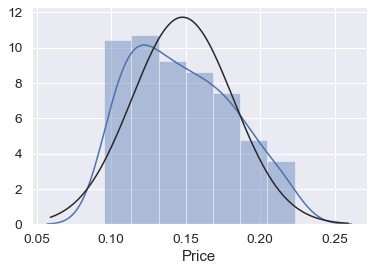

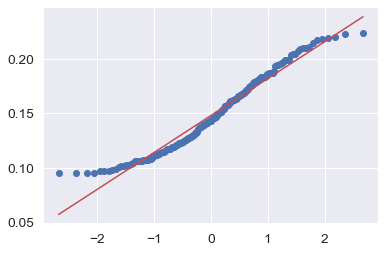

skewness: 0.359439
kurtosis: -0.866030


In [70]:
# kernel density plot
sns.distplot(train.Price,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
#Fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()
print("skewness: %f" % train['Price'].skew())
print("kurtosis: %f" % train ['Price'].kurt())

C:\Users\ssanmartin.SBMGROUP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


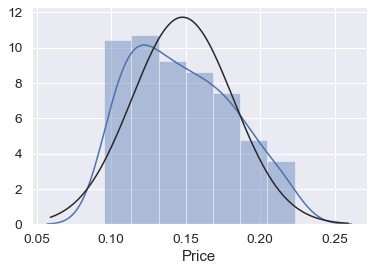

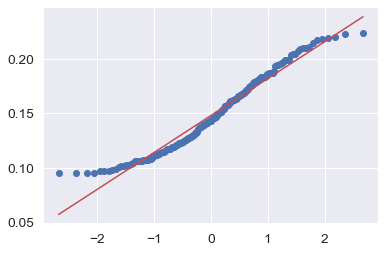

In [69]:
#log transform the target 
train["Price"] = np.log1p(train["Price"])

#Kernel Density plot
sns.distplot(train.Price,fit=norm);
plt.ylabel=('Frequency')
plt.title=('Price distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['Price']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['Price'], plot=plt)
plt.show()


In [27]:
print("skewness: %f" % train['Price'].skew())
print("kurtosis: %f" % train ['Price'].kurt())

skewness: 0.359439
kurtosis: -0.866030


#### Exploring the variables

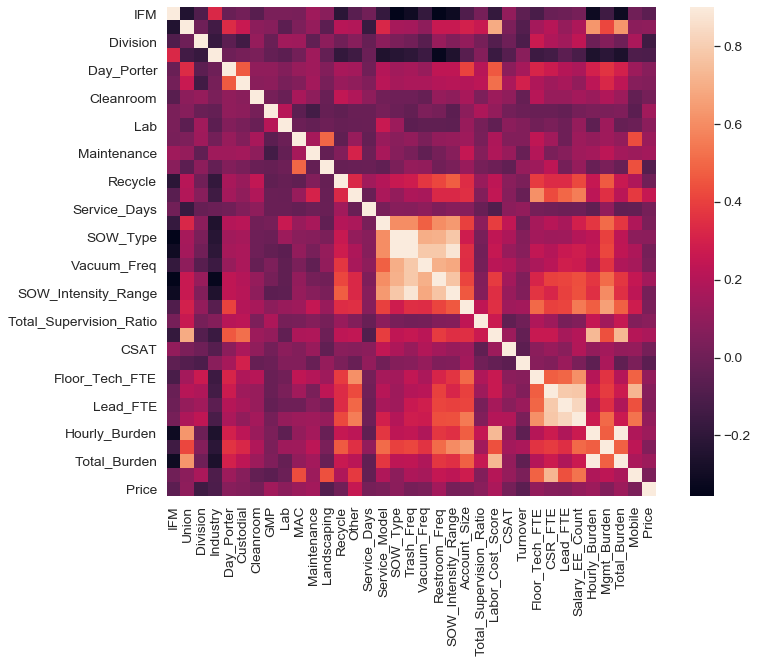

In [76]:
#correration matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

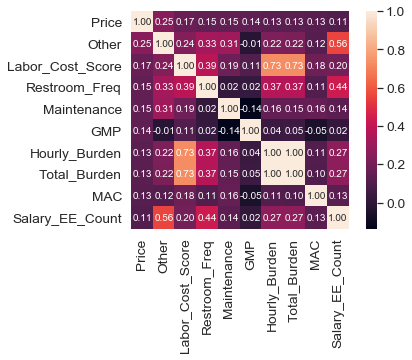

In [77]:
cols = corrmat.nlargest(10, 'Price')['Price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


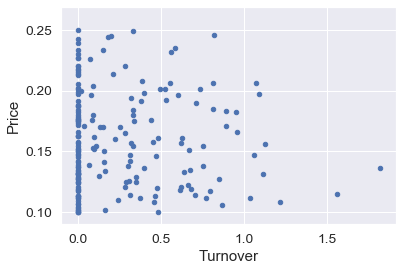

In [68]:
var ='Turnover'
data = pd.concat([train['Price'],train[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.09);
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


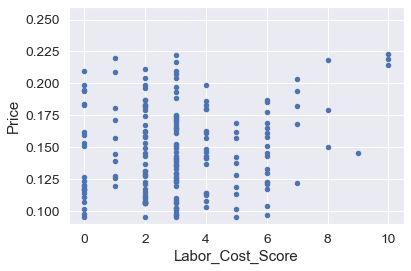

In [79]:
#scatter plot LotArea/Price
var = 'Labor_Cost_Score'
data = pd.concat([train['Price'], train[var]], axis=1)
data.plot.scatter(x= var, y='Price', ylim =(.09,.26));
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


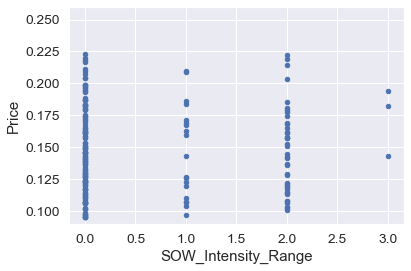

In [80]:
#scatter plot GrLivArea/Price
var ='SOW_Intensity_Range'
data =pd.concat([train['Price'], train[var]], axis=1)
data.plot.scatter(x=var, y='Price',ylim=(0.09,0.26));
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


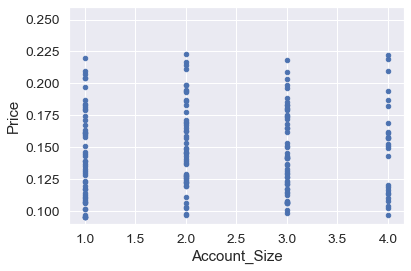

In [81]:
#scatter plot GarageArea/Price
var = 'Account_Size'
data =pd.concat([train['Price'], train[var]], axis=1)
data.plot.scatter(x=var,y='Price', ylim= (0.09,0.26));
plt.show()

In [12]:
#Deleting Outliers
#train = train.drop(train[(train['Labor_Cost_Score']>6) & (train['Price']<0.15)].index)


### Relation exploration for categorical features

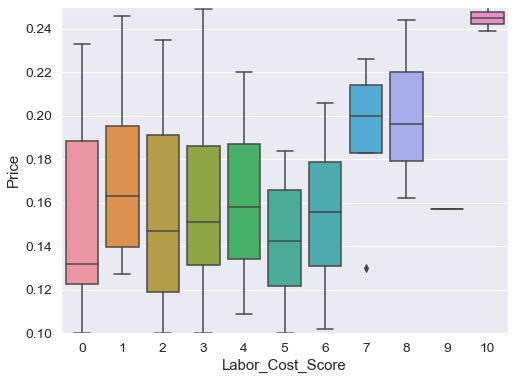

In [65]:
#box plot overallqual/Price
var = 'Labor_Cost_Score'
data = pd.concat([train['Price'], train[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='Price', data=data)
fig.axis(ymin=0.1, ymax=0.25)
plt.show();

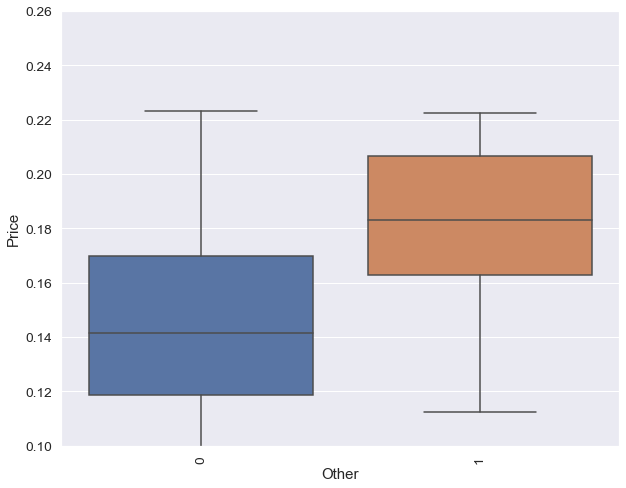

In [83]:
#year built
var  = 'Other'
data= pd.concat([train['Price'], train[var]], axis =1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y='Price', data=data)
fig.axis(ymin=0.1, ymax=.26)
plt.xticks(rotation=90);
plt.show();

In [86]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.Price.values
#train = pd.DataFrame(all_data[:ntrain])
#test = pd.DataFrame(all_data[ntrain:])

#### Linear regression Modeling
I will be implementing
1. Lasso Regression
2. Gradient Boosting Regression 

In [87]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



In [88]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)


In [89]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')



###### scores from the above models


In [90]:
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.0008 (0.0000)


 GBoost score: 0.0075 (0.0013)




#### stacking the models 

###### averaging base model


In [91]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0040 (0.0007)



In [92]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [93]:
#final training and prediction of the stacked regressor

averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train.values, y_train)

RMSLE score on the train data:
0.0009023924106008302
Accuracy score:


0.9992968326613743